# Data Analysis
i) Which are the numerical and which are the categorical?

ii) Is there a greater trend to need an increase in the availability of bicycles? Study this question
from various perspectives:

• Can any trend be seen comparing different hours, weeks, and months?

• Is there any difference between weekdays and holidays?

• Is there any trend depending on the weather? Rainy days, snowy days, etc.

Write concise answers to each question and support your findings with evidence (statistics, plots,
etc.). Discuss the results. Additionally, you can explore the correlation of features, outliers, range of
values, and many more aspects.

In [1]:
import pandas as pd
data = pd.read_csv('data/training_data.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour_of_day     1600 non-null   int64  
 1   day_of_week     1600 non-null   int64  
 2   month           1600 non-null   int64  
 3   holiday         1600 non-null   int64  
 4   weekday         1600 non-null   int64  
 5   summertime      1600 non-null   int64  
 6   temp            1600 non-null   float64
 7   dew             1600 non-null   float64
 8   humidity        1600 non-null   float64
 9   precip          1600 non-null   float64
 10  snow            1600 non-null   int64  
 11  snowdepth       1600 non-null   float64
 12  windspeed       1600 non-null   float64
 13  cloudcover      1600 non-null   float64
 14  visibility      1600 non-null   float64
 15  increase_stock  1600 non-null   object 
dtypes: float64(8), int64(7), object(1)
memory usage: 200.1+ KB


In [3]:
categorical = data[['hour_of_day','day_of_week','month','holiday','weekday','summertime','snow','increase_stock']]
# Snow is a very bad variable it's only either 0 or nan
numerical = data[['temp','dew','humidity','precip','snowdepth','windspeed','cloudcover','visibility']]

In [4]:
# Different hours
hours = sorted(data['hour_of_day'].unique())
hours_high_demand = []
hours_low_demand = []
for hour in hours:
  hours_high_demand.append(len(data.query("hour_of_day == @hour and increase_stock == 'high_bike_demand'")))
  hours_low_demand.append(len(data.query("hour_of_day == @hour and increase_stock == 'low_bike_demand'")))

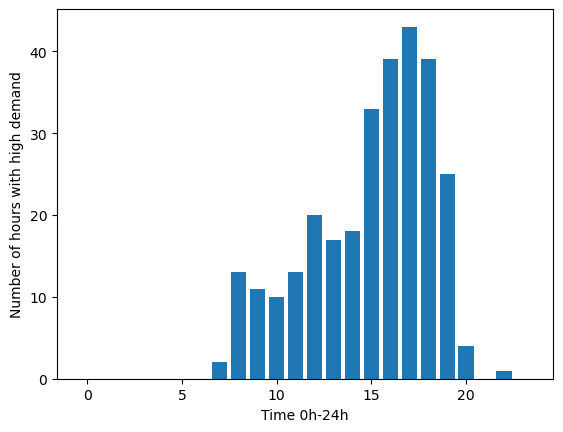

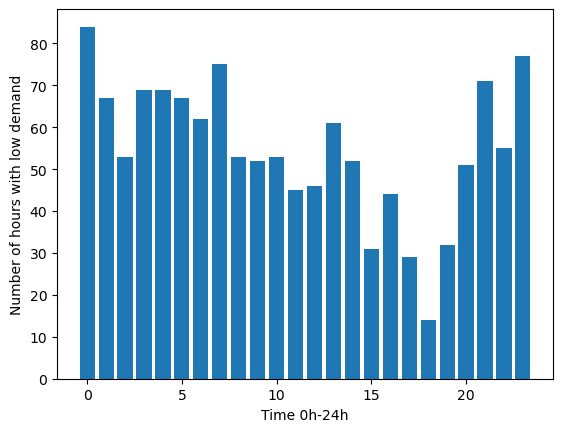

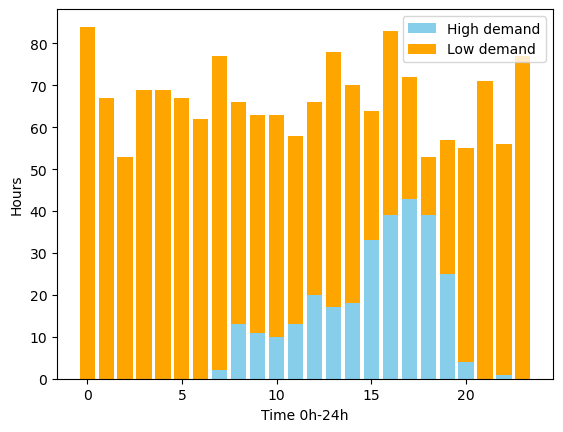

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.bar(hours,hours_high_demand)
plt.xlabel('Time 0h-24h')
plt.ylabel('Number of hours with high demand')
plt.figure()
plt.bar(hours,hours_low_demand)
plt.xlabel('Time 0h-24h')
plt.ylabel('Number of hours with low demand')
plt.figure()
plt.bar(hours,hours_high_demand,color='skyblue',label='High demand')
plt.bar(hours,hours_low_demand,bottom=hours_high_demand,color='orange',label='Low demand')
plt.xlabel('Time 0h-24h')
plt.ylabel('Hours')
plt.legend()

In [6]:
# Different weeks
dws = sorted(data['day_of_week'].unique())
dw_high_demand = []
dw_low_demand = []
for dw in dws:
  dw_high_demand.append(len(data.query("day_of_week == @dw and increase_stock == 'high_bike_demand'")))
  dw_low_demand.append(len(data.query("day_of_week == @dw and increase_stock == 'low_bike_demand'")))

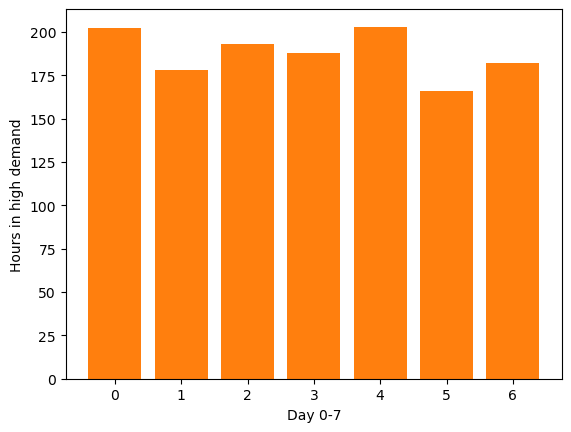

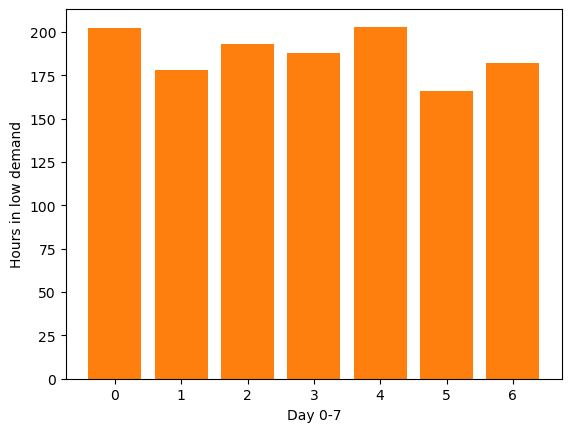

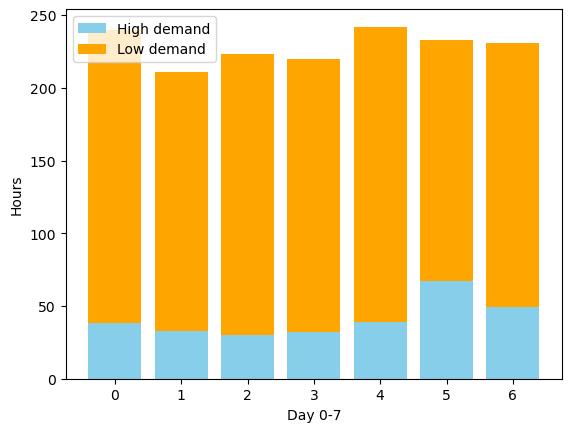

In [7]:
plt.figure()
plt.bar(dws,dw_high_demand)
plt.xlabel('Day 0-7')
plt.ylabel('Hours in high demand')
plt.bar(dws,dw_low_demand)
plt.figure()
plt.bar(dws,dw_high_demand)
plt.xlabel('Day 0-7')
plt.ylabel('Hours in low demand')
plt.bar(dws,dw_low_demand)
plt.figure()
plt.bar(dws,dw_high_demand,color='skyblue',label='High demand')
plt.bar(dws,dw_low_demand,bottom=dw_high_demand,color='orange',label='Low demand')
plt.xlabel('Day 0-7')
plt.ylabel('Hours')
plt.legend()


In [ ]:
# Different months
months = sorted(data['month'].unique())
month_high_demand = []
month_low_demand = []
for month in months:
  month_high_demand.append(len(data.query("month == @month and increase_stock == 'high_bike_demand'")))
  month_low_demand.append(len(data.query("month == @month and increase_stock == 'low_bike_demand'")))

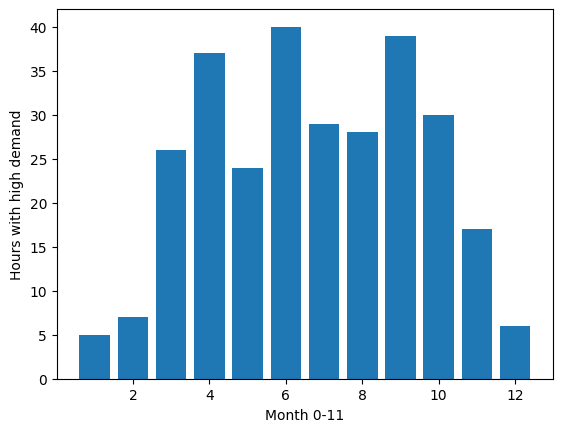

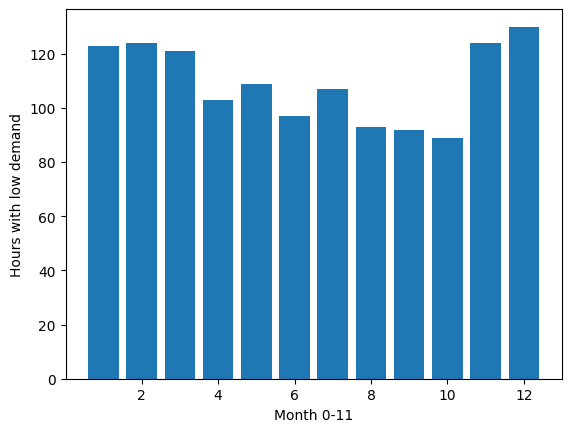

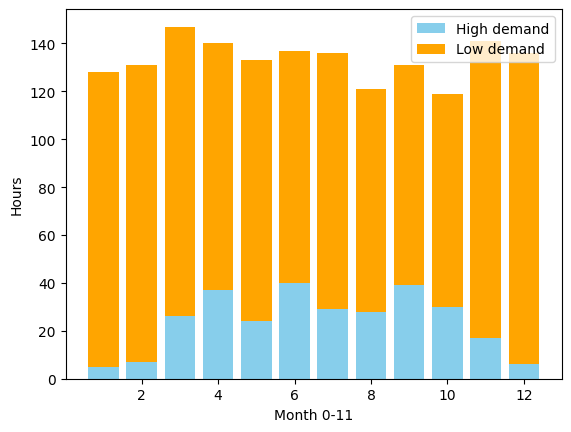

In [ ]:
plt.figure()
plt.bar(months,month_high_demand)
plt.xlabel('Month 0-11')
plt.ylabel('Hours with high demand')
plt.figure()
plt.bar(months,month_low_demand)
plt.xlabel('Month 0-11')
plt.ylabel('Hours with low demand')
plt.figure()
plt.bar(months,month_high_demand,color='skyblue',label='High demand')
plt.bar(months,month_low_demand,bottom=month_high_demand,color='orange',label='Low demand')
plt.xlabel('Month 0-11')
plt.ylabel('Hours')
plt.legend()

In the next cell we test for the diferent correlations.

We remove three columns [dew, snow, weekday] because they are highly correlated with other columns.

We keep all the others for now, we may remove ones later.

<ipython-input-36-a9e537a9001c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.drop(['dew', 'snow', 'weekday'], axis=1).corr()


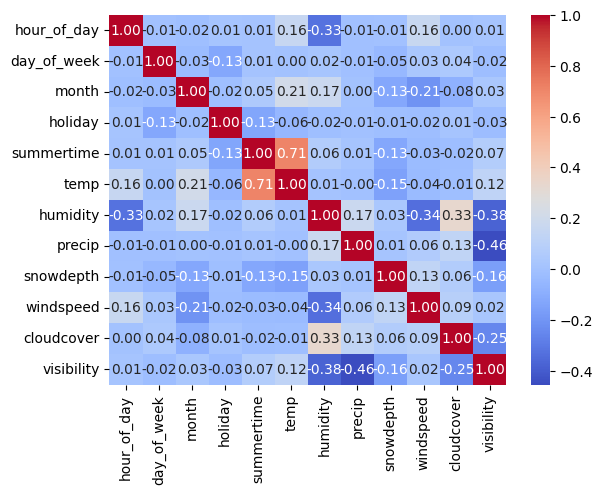

In [ ]:
# Weekdays and holidays
# Weekdays correlated to days as weekdays are just 0-5, weekends are 0-2
correlation_matrix = data.drop(['dew', 'snow', 'weekday'], axis=1).corr()

# Display the correlation matrix
# print(correlation_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()
from statsmodels.stats.outliers_influence import variance_inflation_factor

<Axes: >

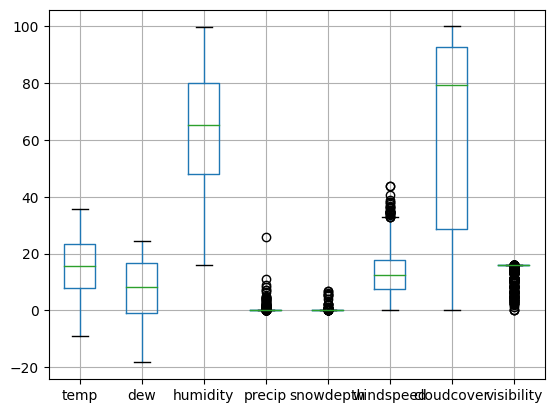

In [ ]:
# Do some bar plots of numerical values
numerical.boxplot()

# Importing packages

In [8]:
import numpy as np
import pandas as pd

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb

from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


import matplotlib.pyplot as plt

# Train - valid - test split

In [9]:
X = data.drop(['dew','snow','weekday','increase_stock'],axis=1)
y = data[['increase_stock']]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1337)

In [11]:
def print_metrics(model,X_test,y_test):
  y_preds = model.predict(X_test)
  y_test = np.array(y_test).reshape(-1)
  #Confusion Matrix
  cross_vals=pd.crosstab(y_preds, y_test)
  print(cross_vals)
  #True positive (Estimated true and is true)
  TP = cross_vals.iloc[1,1]
  #False positive (Estimated true and is false)
  FP = cross_vals.iloc[1,0]
  #True negative (Estiamted false and is false)
  TN = cross_vals.iloc[0,0]
  #False negative (Estimated false and is true)
  FN = cross_vals.iloc[0,1]
  missclassification_rate = np.mean([y_preds != y_test])
  print(f"Missclassification {missclassification_rate}")
  accuracy = 1-missclassification_rate
  print(f"Accuracy {accuracy}")
  recall = TP/(TP+FN)
  print(f"Recall {recall}")
  precision = TP/(TP+FP)
  print(f"Precision {precision}")
  specificity = TN/(TN+FP)
  print(f"Specificity {specificity}")

# Logistic Regression

In [8]:
model = skl_lm.LogisticRegression(solver='liblinear')

model.fit(X_train, y_train)

print_metrics(model, X_test, y_test)

# prediction = model.predict(X_test)
# numerical_prediction = [(0 if i == 'low_bike_demand' else 1) for i in prediction]

# confusion_matrix(y_test, prediction)
# missclassification = np.mean(y_test != prediction)

col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                35               18
low_bike_demand                 53              374
Missclassification 0.14791666666666667
Accuracy 0.8520833333333333
Recall 0.9540816326530612
Precision 0.8758782201405152
Specificity 0.3977272727272727


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Discriminate Analysis

In [6]:
model = skl_da.LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
print_metrics(model, X_test, y_test)

col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                36               20
low_bike_demand                 52              372
Missclassification 0.15
Accuracy 0.85
Recall 0.9489795918367347
Precision 0.8773584905660378
Specificity 0.4090909090909091


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
model = skl_da.QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)
print_metrics(model, X_test, y_test)

col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                59              159
low_bike_demand                 29              233
Missclassification 0.39166666666666666
Accuracy 0.6083333333333334
Recall 0.5943877551020408
Precision 0.8893129770992366
Specificity 0.6704545454545454


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# K nearest neighbours

In [ ]:
n = 10
model = skl_nb.KNeighborsClassifier(n_neighbors=n)
model.fit(X_train, y_train)
print_metrics(model, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                50               36
low_bike_demand                 38              356
Missclassification 0.15416666666666667
Accuracy 0.8458333333333333
Recall 0.9081632653061225
Precision 0.9035532994923858
Specificity 0.5681818181818182


# Tree based methods

In [ ]:
#Decision tree
model = tree.DecisionTreeClassifier(max_depth=25)
model.fit(X_train, y_train)
print_metrics(model, X_test, y_test)

col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                61               43
low_bike_demand                 27              349
Missclassification 0.14583333333333334
Accuracy 0.8541666666666666
Recall 0.8903061224489796
Precision 0.9281914893617021
Specificity 0.6931818181818182


In [ ]:
# Bagging
model = BaggingClassifier()
model.fit(X_train, y_train)
print_metrics(model, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                65               38
low_bike_demand                 23              354
Missclassification 0.12708333333333333
Accuracy 0.8729166666666667
Recall 0.9030612244897959
Precision 0.9389920424403183
Specificity 0.7386363636363636


In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
print_metrics(model, X_test, y_test)

<ipython-input-61-3396c1d5da7a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                58               19
low_bike_demand                 30              373
Missclassification 0.10208333333333333
Accuracy 0.8979166666666667
Recall 0.951530612244898
Precision 0.9255583126550868
Specificity 0.6590909090909091
